# Covid data

[ADD INTRO HERE]

<b>Section 1a: County level COVID case and election data preparation</b><br>
<b>Section 1b: County level COVID case and election chart preparation</b><br>
<b>Section 1c: County level main code for COVID cases and elections</b><br>
<b>Section 1d: Comments on county level COVID cases and elections</b><br>
<b>Section 2a: County level COVID deaths and elections chart preparation</b><br>
<b>Section 2b: County level main code for COVID deaths and elections</b><br>
<b>Section 3a: State level vaccination and election data/chart preparation</b><br>
<b>Section 3b: State level main code for vaccinations and elections</b><br>
<b>Section 4: Notes</b><br>
<b>Section 5: Sources</b><br>


In [1]:
from ETLForElectionAndVaccinationData import *

## Section 1a: County level COVID case and election data preparation

getRollingCaseAverageSegmentLevel()<br>
getCasesRollingAveragePer100K()<br>
getElectionSegmentsData()<br>
getElectionData()

## Section 1b: County level COVID case and election chart preparation

createChart()<br>
getBaseChart()<br>
getSelection()<br>
createTooltip()

## Section 1c: County level main code for COVID cases and elections

Creates chart showing rolling average of COVID cases over time segmented by change - if any - of political affiliation.

In [2]:
# Get rolling average of cases by segment
case_rolling_df = getRollingCaseAverageSegmentLevel()
segment_list = case_rolling_df.changecolor.unique()

# Create the chart
base, make_selector, highlight_segment, radio_select  = createChart(case_rolling_df)
selectors, rules, points, tooltip_text  = createTooltip(base, radio_select, case_rolling_df)


# Bring all the layers together with layering and concatenation
( alt.layer(
    highlight_segment, selectors, points,rules, tooltip_text ) | make_selector 
)



alt.HConcatChart(...)

## Section 1d: Comments on county level COVID cases and elections

##TBD TO confirm
An Associated Press analysis reveals that in 376 counties with the highest number of new cases per capita, the overwhelming majority—93% of those counties—went for Trump, a rate above other less severely hit areas.

https://fortune.com/2020/11/06/trump-voters-covid-cases-red-counties-2020-election-results/

Many Places Hard Hit By COVID-19 Leaned More Toward Trump In 2020 Than 2016
Support for President Trump increased in 2020 in many of the U.S. counties that lost lives at the highest rate to COVID-19, according to an NPR analysis.

Of the 100 counties with the highest COVID-19 death rates per capita, 68 had a higher proportion of votes cast for Trump this cycle than they did in 2016. This includes both Republican-leaning counties and counties that supported Joe Biden.
https://www.npr.org/sections/health-shots/2020/11/06/930897912/many-places-hard-hit-by-covid-19-leaned-more-toward-trump-in-2020-than-2016


## Section 2a: County level COVID deaths and elections chart preparation

createPercentPointChangeAvgDeathsChart()

## Section 2b: County level main code for COVID deaths and elections

Creates chart showing average COVID deaths versus percent change for each political affiliation. Data point colors are segmented by change - if any - in affiliation.

In [3]:
# Display the chart

createPercentPointChangeAvgDeathsChart()

alt.LayerChart(...)

<b>Covid vaccination data</b><br>
   > Source : [COVID-19 Vaccinations in the United States](https://covid.cdc.gov/covid-data-tracker/#vaccinations)<br>
     Looking into Covid vaccination percentages by party affiliation measure by 2020 Presidential elections<br>
     Data as of : Data as of: June 26, 2021 <br>
     Source:  [State level election results](https://dataverse.harvard.edu/file.xhtml?fileId=4299753&version=6.0)
    

## Section 3a: State level vaccination and election data/chart preparation

createStateVaccinationChart()<br>
createStateVaccinationData()<br>
getStateLevelElectionData2020()

## Section 3b: State level main code for vaccinations and elections

Creates a chart showing change in percentage of population vaccinated by state. Data is segmented by presidential election choice, implying state political affiliation. Bubble size is proportional to state population. (Questions: Add to legend?)

In [4]:
# Create the chart
#createStateVaccinationChart()

## Section 4: Notes

    Note about the data
            The data in these files is a different version of the data in our main U.S. cases and deaths files.
            Instead of cumulative totals, each file contains the daily number of new cases and deaths, the
            seven-day rolling average and the seven-day rolling average per 100,000 residents.
                      
    Confirmed Cases
            Confirmed cases are counts of individuals whose coronavirus infections were confirmed by a
            laboratory test and reported by a federal, state, territorial or local government agency. Only
            tests that detect viral RNA in a sample are considered confirmatory. These are often called
            molecular or RT-PCR tests.
              
            Another dataset : https://dataverse.harvard.edu/file.xhtml?fileId=4593425&version=54.1
              
            Since the first reported coronavirus case in Washington State on Jan. 21, 2020, The Times has
            tracked cases of coronavirus in real time as they were identified after testing. Because of the
            widespread shortage of testing, however, the data is necessarily limited in the picture it presents
            of the outbreak.
              
            This data is for cumulative cases
            
            # We can join the NYTime latest data with population data from census for 2020
            df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
            
            
  
    

## Section 5: Daily Vaccination Rate Interactive chart 

Interactive charts allow the user to weild the power to slice and dice and pause and view the data as per questions arising when viewing the visualizations.

>Source: Data.CDC.gov [Covid-19 Vaccinaions in the United State Jurisdiction](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc)




In [5]:
final_chart = createDailyInteractiveVaccinationChart()
final_chart

alt.LayerChart(...)

## Section 5  Mask data



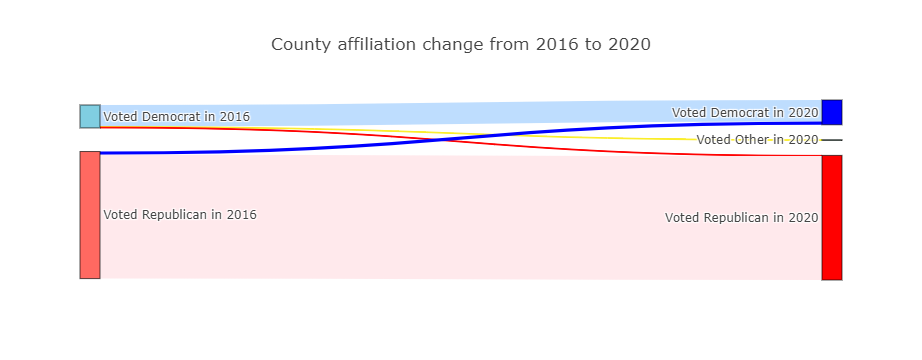

In [6]:
fig = createSankeyForAffilitionChange()
fig

# API Calls for vaccination data
[Source: CDC ](https://www.cdc.gov/coronavirus/2019-ncov/vaccines/distributing/reporting-counties.html)

The lowdown on API calls:
To identify and limit rogue requests, most API data provisioning sites require that one acquire an API data token. After creating a Socrata account, I was able to apply for an API token for this application [here](https://data.cdc.gov/signed_out?return_to=%2Fprofile%2Fedit%2Fdeveloper_settings).

For each dataset, the CDC website also provides a URL to which this API taken can be applied. The URL request can be request the reposnse in JSON, CSV and other formats. I chose the CSV format.  Other than the token you can concatenate parameters of your GET request to the URL string.
FOr instance in our call below, the data was requested in batches of 500,000 rows (all columns - although these can be specifically requested). And so we limit the data tp 500,000 and update the offset by 500,000 with every call.

One more note about the APIToken. Since this is a personal secret access key, the token was stored in a **pickle** file (string format serialized) and then retrieved from it for the concatenation. 

The **requests** module of Python is used to submit this token and parameter enhanced URL. Since we are only interested in reading the data, we issue a **GET** command. 

The response **text** is converted to csv using the StringIO to convert it to String and then using pandas read_csv call which saves the data along with the headers into a dataframe.

The data for the vaciinations are updated on a daily basis by the CDC. Using the API enables us to update the visualization as and when the data gets updated. (We are storing it into a CSV file so that we do not send too many calls to the API endpoint as we develop).


**DATA AT COUNTY LEVEL ISSUES**
> Exceptions to County-Level Data
California does not report the county of residence for persons receiving a vaccine when the resident’s county has a population of fewer than 20,000 people. (CDC)
Hawaii does not provide CDC with county-of-residence information. (CDC)
Texas provides data that are aggregated at the state level and cannot be stratified by county. (CDC)
For several counties in Colorado the percent of population is marked as 0 - this appears to be a reporting and recording issue to me but I am not sure how a large number of counties in Colorado have no vaccination counts at all.(My observation)



## The chart below aloows for comparison of two states  for trend of delta variant cases- one selected from the  vaccination graph above and one selected from the dropdown below. The average US trend is also plotted as a baseline.


Create a time series chart from the time of vaccinations for US and all states

In [7]:
# Put the five layers into a chart and bind the data

vaccine_chart, us_timeseries, state_cases_delta_chart,\
state_selectors, rules, tooltip_text1,\
tooltip_text2, tooltip_text3, points= createCombinedVaccinationAndDeltaVariantTrend()

vaccine_chart & alt.layer(
    (state_cases_delta_chart + us_timeseries), 
      state_selectors, rules, tooltip_text1, 
      tooltip_text2, tooltip_text3, points
).properties(
    width=600, height=300
)

alt.VConcatChart(...)

> The New York Times is releasing estimates of mask usage by county in the United States.

>This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)
Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

>This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again.
The fields have the following definitions:

    COUNTYFP: The county FIPS code.
    NEVER: The estimated share of people in this county who would say never in response to the question 
     “How often do you wear a mask in public when you expect to be within six feet of another person?”
    RARELY: The estimated share of people in this county who would say rarely
    SOMETIMES: The estimated share of people in this county who would say sometimes
    FREQUENTLY: The estimated share of people in this county who would say frequently
    ALWAYS: The estimated share of people in this county who would say always
    
    
>What the numbers mean
To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population.

>By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data.



In [8]:
createCombinedElectoralAndMaskUsageCharts().configure_view(strokeOpacity=0)


alt.VConcatChart(...)

 ### Dependencies 
    %reload_ext watermark
    CPython 3.7.7
    IPython 7.19.0

    pandas 1.1.0
    ipywidgets 7.5.1
    plotly 4.12.0
    altair 4.1.0

    compiler   : MSC v.1900 64 bit (AMD64)
    system     : Windows
    release    : 10
    machine    : AMD64
    processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
    CPU cores  : 8
    interpreter: 64bit

In [9]:
### HOW THE CREDENTIALS WERE STORED IN A PICKLE FILES

# import pickle

# ## https://data.cdc.gov/profile/edit/developer_settings

# APIToken = "MyToken"
# pickle_out = open("APIToken.pickle","wb")
# pickle.dump(APIToken, pickle_out)
# pickle_out.close()

## Section 6: Sources

 >Source: [New York Time Github Covid data](https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv)<br>      [Estimates of mask use](https://github.com/nytimes/covid-19-data/tree/master/mask-use)


In [10]:
# %load_ext watermark
# %watermark -v -m -p pandas,ipywidgets,plotly,altair
